In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,VGG19,ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
dataset = 'Data'

In [3]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [4]:
import numpy as np
import cv2
from imutils import paths
import os

In [5]:
args = {}
args['dataset'] = dataset

In [6]:
ipaths = list(paths.list_images(args['dataset'])) ##lists all images in path

data= []
labels = []

# label = ipaths[0].split(os.path.sep)

for ipath in ipaths:
    label = ipath.split(os.path.sep)[-2]
    image = cv2.imread(ipath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    image = image/255.0
    data.append(image)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)





In [7]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [8]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [10]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [11]:
(x_train,x_test,y_train,y_test) = train_test_split(data,labels, test_size=0.2,random_state=42, stratify=labels)

In [12]:
y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [13]:
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [14]:
trainAug

# Model

In [15]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)

for layer in bModel.layers:
    layer.trainable = False

In [16]:
bModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
opt = Adam(lr=INIT_LR,decay = INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [19]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

R = model.fit_generator(
    trainAug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 20 steps, validate on 40 samples
Epoch 1/10
20/20 [==============================] - 57s 3s/step - loss: 0.7417 - accuracy: 0.5375 - val_loss: 0.5803 - val_accuracy: 0.7750
Epoch 2/10
20/20 [==============================] - 52s 3s/step - loss: 0.5494 - accuracy: 0.7437 - val_loss: 0.4597 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 52s 3s/step - loss: 0.4259 - accuracy: 0.8750 - val_loss: 0.3744 - val_accuracy: 0.9250
Epoch 4/10
20/20 [==============================] - 56s 3s/step - loss: 0.3369 - accuracy: 0.9500 - val_loss: 0.2873 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 57s 3s/step - loss: 0.2686 - accuracy: 0.9375 - val_loss: 0.2331 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 57s 3s/step - loss: 0.2135 - accuracy: 0.9688 - val_loss: 0.2218 - val_accuracy: 0.9500
Epoch 7/10
20/20

In [26]:
model.save('Covid_detection.h5')

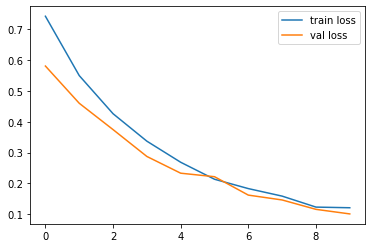

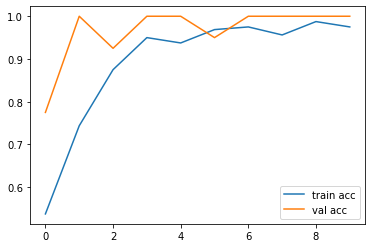

In [27]:
import matplotlib.pyplot as plt

plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred,target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

In [30]:
cm

array([[20,  0],
       [ 0, 20]], dtype=int64)

In [31]:
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_detection.h5')
from keras.applications.vgg16 import preprocess_input

In [32]:
img = image.load_img('C:\\Users\\PAVAN\\Untitled Folder\\Corona Detection\\Data\\Covid\\9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg',target_size=(224,224))

In [33]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x

array([[[[184., 184., 184.],
         [179., 179., 179.],
         [178., 178., 178.],
         ...,
         [167., 167., 167.],
         [167., 167., 167.],
         [169., 169., 169.]],

        [[ 85.,  85.,  85.],
         [ 71.,  71.,  71.],
         [ 64.,  64.,  64.],
         ...,
         [  7.,   7.,   7.],
         [  7.,   7.,   7.],
         [  7.,   7.,   7.]],

        [[  3.,   3.,   3.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         ...,
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.]],

        ...,

        [[  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         ...,
         [ 16.,  16.,  16.],
         [ 13.,  13.,  13.],
         [  1.,   1.,   1.]],

        [[  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         ...,
         [ 15.,  15.,  15.],
         [ 13.,  13.,  13.],
         [  1.,   1.,   1.]],

        [[  1.,   1.,   1.],
       

In [34]:
img_data = preprocess_input(x)
img_data

array([[[[  80.061   ,   67.221   ,   60.32    ],
         [  75.061   ,   62.221   ,   55.32    ],
         [  74.061   ,   61.221   ,   54.32    ],
         ...,
         [  63.060997,   50.221   ,   43.32    ],
         [  63.060997,   50.221   ,   43.32    ],
         [  65.061   ,   52.221   ,   45.32    ]],

        [[ -18.939003,  -31.779   ,  -38.68    ],
         [ -32.939003,  -45.779   ,  -52.68    ],
         [ -39.939003,  -52.779   ,  -59.68    ],
         ...,
         [ -96.939   , -109.779   , -116.68    ],
         [ -96.939   , -109.779   , -116.68    ],
         [ -96.939   , -109.779   , -116.68    ]],

        [[-100.939   , -113.779   , -120.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         ...,
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        ...,

        [[-102.939   , -115.779   , -1

Prediction: Normal


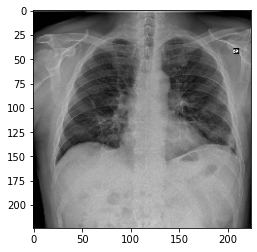

In [35]:
res = model.predict(img_data)
fres = np.argmax(res,axis=1)
plt.imshow(img)

if fres==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')